# Spotify Report

Group 70: Divyam Misra, Haixing Yin, Yi Zhai

## Data Collection

* Use Spotipy to get Spotify public playlists data
* For each playlist, we get our response variable: # of followers
* For predictors, we pick the following attributes:
    * the number of tracks in the playlist
    * Audio Features
        * Popularity
        * Acousticness
        * Danceability
        * Instrumentalness
        * Liveness
        * Loudness
        * Valence
    * Artists Information 
        * Genre
        * Popularity
    * Avaiable markets: if this playlist can reach wider range, it might get more followers

In total, we are getting 18 features for now.

In [1]:
import pandas as pd 
import numpy as np
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

playlists = sp.user_playlists('spotify')
playlists_data = []
while playlists:
    for i, playlist in enumerate(playlists['items']):
        playlist_data = {}
        playlist_data["songs"] = []
        
        uri = playlist["uri"]
        username = uri.split(':')[2]
        playlist_id = uri.split(':')[4]
        
        results = sp.user_playlist(username, playlist_id)
        
        playlist_data["playlist_id"] = playlist_id

        playlist_data["followers"] = results['followers']['total']
        
        playlist_data["tracks_num"] = playlist['tracks']['total']
        
        playlist_data["name"] = playlist["name"]
        if i%100 == 0:
            print(i,playlist_data["name"])
        
        tracks = sp.user_playlist_tracks("spotify",playlist_id)
        markets = []
        pop = []
        for j in range(tracks_num):
            try:
                playlist_data["songs"].append(tracks["items"][j]["track"]['name']) 
                
                market = tracks["items"][i]["track"]["available_markets"]
                markets = list(set().union(markets,market))
                
                pop.append(tracks["items"][j]["track"]['popularity'])
                
            except:
                continue
        playlist_data["avaiable_market"] = len(markets)
        if pop != []:
            playlist_data["pop_mean"] = np.mean(pop)
            playlist_data["pop_std"] = np.std(pop)
        else:
            playlist_data["pop_mean"] = np.nan
            playlist_data["pop_std"] = np.nan

        playlists_data.append(playlist_data)
    
    if playlists['next']:
        playlists = sp.next(playlists)
    else:
        playlists = None

In [2]:
start = 0
end = 1700
for i, playlist in enumerate(pl_more[start:end]):
    for j, track in enumerate(playlist['tracks']):
        if track != None:
            try:
                track_audio=sp.audio_features(track['id'])
                if track_audio[0] != None and track_audio!=None:
                    pl_more[i+start]['tracks'][j].update(track_audio[0])
                if (type(track['artists'])==list):
                    track_artist = sp.search(q='artist:'+track['artists'][0]['name'], type='artist')
                elif (type(track['artists'])==dict):   
                    track_artist = sp.search(q='artist:'+track['artists']["items"][0]['name'], type='artist')
                else:
                    print(i+start,"no artist")
                    track_artist = None
                if track_artist:
                    pl_more[i+start]['tracks'][j].update(track_artist)  
            except:
                print("!!",i+start)
#     print(i+start)

## Feature Engineering

In [8]:
import json
with open('data_1700.json','r') as js:
    pl_1700=json.load(js)

In [9]:
playlists_data = []
for pl in pl_1700:
    try:
        playlist_data = {}

        # followers
        # tracks_num
        playlist_data["name"] = pl["list"]["name"]
        playlist_data["followers"] = pl["list"]["followers"]["total"]
        playlist_data["tracks_num"] = pl["list"]["tracks"]["total"]

        # market 
        # popularity
        markets = []
        gen = []
        artist_pop = []
        pop = []
        acous = []
        dance = []
        energy = []
        instru = []
        live = []
        loud = []
        valence = []
        for j in range(playlist_data["tracks_num"]):


            market = pl["tracks"][j]["available_markets"]
            markets = list(set().union(markets,market))
            gen.extend(pl["tracks"][j]["artists"]["items"][0]["genres"])
            artist_pop.append(pl["tracks"][j]["artists"]["items"][0]["popularity"])

            pop.append(pl["tracks"][j]['popularity'])
            acous.append(pl["tracks"][j]['acousticness'])
            dance.append(pl["tracks"][j]['danceability'])
            energy.append(pl["tracks"][j]['energy'])
            instru.append(pl["tracks"][j]['instrumentalness'])
            live.append(pl["tracks"][j]['liveness'])
            loud.append(pl["tracks"][j]['loudness'])
            valence.append(pl["tracks"][j]['valence'])

        playlist_data["avaiable_market"] = len(markets)

        c = Counter(gen)
        playlist_data["genre"] = c.most_common()[0][0]
        
        if artist_pop != []:
            playlist_data["artist_pop_mean"] = np.mean(artist_pop)
            playlist_data["artist_pop_std"] = np.std(artist_pop)
        else:
            playlist_data["artist_pop_mean"] = np.nan
            playlist_data["artist_pop_std"] = np.nan 

        if pop != []:
            playlist_data["pop_mean"] = np.mean(pop)
            playlist_data["pop_std"] = np.std(pop)
        else:
            playlist_data["pop_mean"] = np.nan
            playlist_data["pop_std"] = np.nan

        if acous != []:
            playlist_data["acous_mean"] = np.mean(acous)
            playlist_data["acous_std"] = np.std(acous)
        else:
            playlist_data["acous_mean"] = np.nan
            playlist_data["acous_std"] = np.nan     

        if dance != []:
            playlist_data["dance_mean"] = np.mean(dance)
            playlist_data["dance_std"] = np.std(dance)
        else:
            playlist_data["dance_mean"] = np.nan
            playlist_data["dance_std"] = np.nan

        if energy != []:
            playlist_data["energy_mean"] = np.mean(energy)
            playlist_data["energy_std"] = np.std(energy)
        else:
            playlist_data["energy_mean"] = np.nan
            playlist_data["energy_std"] = np.nan

        if instru != []:
            playlist_data["instru_mean"] = np.mean(instru)
            playlist_data["instru_std"] = np.std(instru)
        else:
            playlist_data["instru_mean"] = np.nan
            playlist_data["instru_std"] = np.nan

        if live != []:
            playlist_data["live_mean"] = np.mean(live)
            playlist_data["live_std"] = np.std(live)
        else:
            playlist_data["live_mean"] = np.nan
            playlist_data["live_std"] = np.nan

        if loud != []:
            playlist_data["loud_mean"] = np.mean(loud)
            playlist_data["loud_std"] = np.std(loud)
        else:
            playlist_data["loud_mean"] = np.nan
            playlist_data["loud_std"] = np.nan

        if valence != []:
            playlist_data["valence_mean"] = np.mean(valence)
            playlist_data["valence_std"] = np.std(valence)
        else:
            playlist_data["valence_mean"] = np.nan
            playlist_data["valence_std"] = np.nan

        playlists_data.append(playlist_data)
    except:
        continue

In [10]:
playlists_dataframe = pd.DataFrame.from_dict(playlists_data)

In [11]:
df = playlists_dataframe.copy()
df["genre_narrow"] = ""
df.loc[df["genre"].str.contains('pop'),"genre_narrow"] = "pop"
df.loc[df["genre"].str.contains('metal'),"genre_narrow"] = "metal"
df.loc[df["genre"].str.contains('jazz'),"genre_narrow"] = "jazz"
df.loc[df["genre"].str.contains('rock'),"genre_narrow"] = "rock"
df.loc[df["genre"].str.contains('punk'),"genre_narrow"] = "punk"
df.loc[df["genre"].str.contains('hop'),"genre_narrow"] = "hiphop"
df.loc[df["genre"].str.contains('new'),"genre_narrow"] = "modern"
df.loc[df["genre"].str.contains('post'),"genre_narrow"] = "modern"
df.loc[df["genre"].str.contains('modern'),"genre_narrow"] = "modern"
df.loc[df["genre"].str.contains('classical'),"genre_narrow"] = "classical"
df.loc[df["genre"].str.contains('soul'),"genre_narrow"] = "soul"
df.loc[df["genre"].str.contains('blues'),"genre_narrow"] = "blues"
df.loc[df["genre"].str.contains('core'),"genre_narrow"] = "hardcore"
df.loc[df["genre"].str.contains('children'),"genre_narrow"] = "children"
df.loc[df["genre"].str.contains('dance'),"genre_narrow"] = "dance"
df.loc[df["genre"].str.contains('rap'),"genre_narrow"] = "rap"
df.loc[df["genre"].str.contains('drama'),"genre_narrow"] = "drama"
df.loc[df["genre"].str.contains('funk'),"genre_narrow"] = "funk"
df.loc[df["genre"].str.contains('edm'),"genre_narrow"] = "electronic"
df.loc[df["genre"].str.contains('electronic'),"genre_narrow"] = "electronic"
df.loc[df["genre"].str.contains('ambient'),"genre_narrow"] = "healing"
df.loc[df["genre"].str.contains('environmental'),"genre_narrow"] = "healing"
df.loc[df["genre"].str.contains('healing'),"genre_narrow"] = "healing"
df.loc[df["genre"].str.contains('hollywood'),"genre_narrow"] = "hollywood"
df.loc[df["genre_narrow"]== "","genre_narrow"] = "other"

In [12]:
df = df.drop(["genre"],axis=1)
df_with_dummies = pd.get_dummies(df, columns = ["genre_narrow"])
# df_with_dummies.to_json("playlists_dataframe_all_dummy.json")

In [13]:
dataframe = pd.DataFrame.from_dict(playlists_data)

## Data Description (Feature table)

Now, we have 1700 playlists with 22 features. The following are the details about each features. (More analysis, see EDA page)


| Key                             | Value Type   | Value Description                                                                                                                                                                                                                                                                                                                                                                                                    | Feature Engineering                                                                                                                 |
|---------------------------------|--------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------|
| followers                       | int          | Number of Followers: from 0 to inf, indicate how many people follow this playlist.                                                                                                                                                                                                                                                                                                                                   | Probably need to do some log transformation later.                                                                                  |
| name                            | string       | Name of the playlist.                                                                                                                                                                                                                                                                                                                                                                                                |                                                                                                                                     |
| acous_mean  acous_std           | float  float | Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.                                                                                                                                                                                                                                                                           | Get the mean/standard deviation of acousticness for all track in the playlist.                                                      |
| artist_pop_mean  artist_pop_std | float  float | Popularity (Artist): How popular this artist is and measured from 0.0 to 100.0. 100.0 represents most popular.                                                                                                                                                                                                                                                                                                       | Get the mean/standard deviation of popularity for all artists in each track inside one playlist.                                    |
| avaiable_market                 | int          | The number of available markets: how many possible markets can download/listen to this playlist.                                                                                                                                                                                                                                                                                                                     | Convert lists of available markets to numbers, and get the maximum number of market for all tracks in the playlist.                 |
| dance_mean  dance_std           | float  float | Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.                                                                                                                                                                         | Get the mean/standard deviation of danceability for all track inside one playlist.                                                  |
| energy_mean  energy_std         | float  float | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.                            | Get the mean/standard deviation of energy for all track inside one playlist.                                                        |
| instru_mean  instru_std         | float  float | Instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. | Get the mean/standard deviation of instrumentalness for all track inside one playlist.                                              |
| live_mean  live_std             | float  float | Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.                                                                                                                                                                                    | Get the mean/standard deviation of liveness for all track inside one playlist.                                                      |
| loud_mean  loud_std             | float  float | Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.                                                                               | Get the mean/standard deviation of loudness for all track inside one playlist.                                                      |
| pop_mean  pop_std               | float  float | Popularity (track): How popular this artist is and measured from 0.0 to 100.0. 100.0 represents most popular.                                                                                                                                                                                                                                                                                                        | Get the mean/standard deviation of popularity for all track inside one playlist. Need to check the collinearity with pop of artist. |
| tracks_num                      | int          | How many tracks are inside this playlist. From 0 to inf.                                                                                                                                                                                                                                                                                                                                                             |                                                                                                                                     |
| valence_mean   valence_std      | float  float | Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).                                                                                                                                                           | Get the mean/standard deviation of valence for all track inside one playlist.                                                       |
| genre_narrow                    | string       | Genre: From over 130 genres, narrow down to 20 general genres. For example: "pop", "rap", "classical", etc.   | Just get genre from artists information, and find the most common genre for the playlist.

## EDA

In [14]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

In [22]:
songs_df = pd.read_json('playlists_dataframe_all.json')

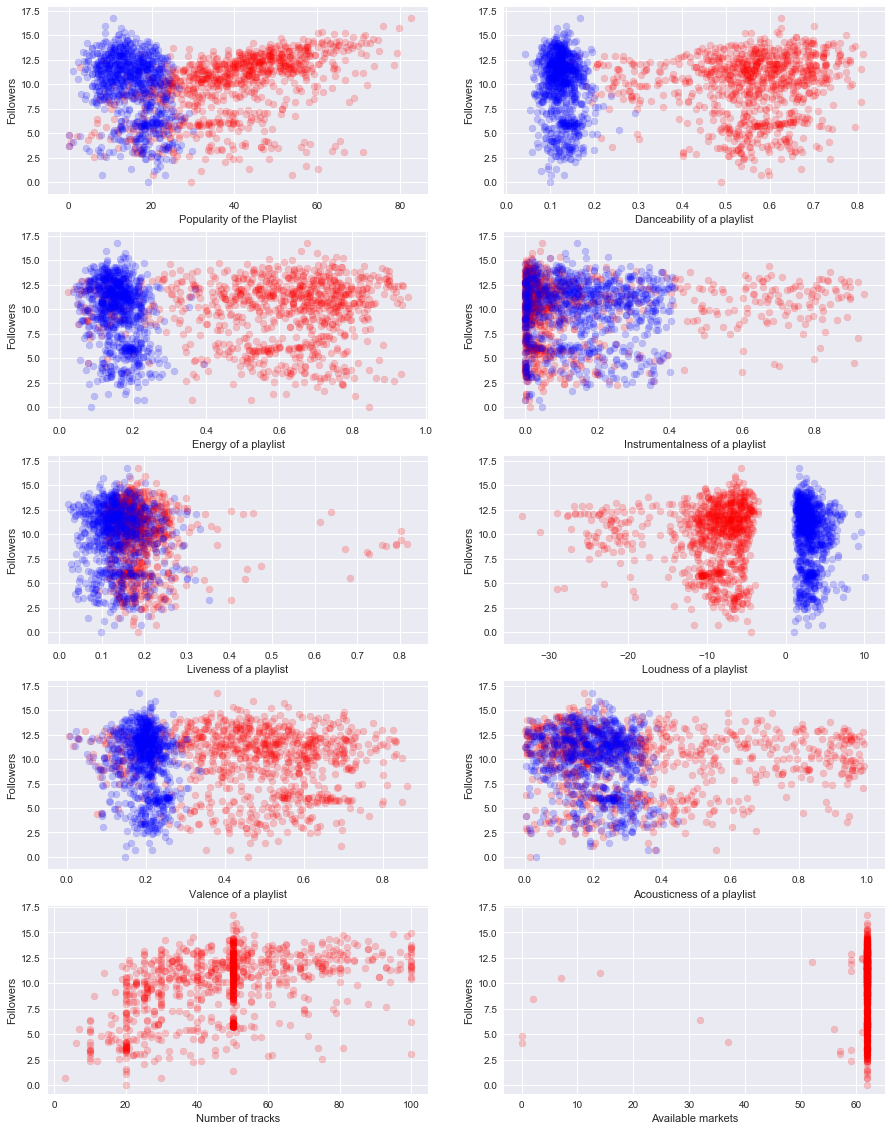

In [18]:
np.seterr(divide='ignore')
fig, ax = plt.subplots(5,2,figsize=(15,20))

ax[0][0].scatter( songs_df['pop_mean'].values, np.log(songs_df['followers'].values), alpha=0.2 , c='r')
ax[0][0].scatter(songs_df['pop_std'].values, np.log(songs_df['followers'].values), alpha=0.2, c='b')
ax[0][0].set_xlabel("Popularity of the Playlist")
ax[0][0].set_ylabel("Followers")

ax[0][1].scatter(songs_df['dance_mean'].values, np.log(songs_df['followers'].values), alpha=0.2 , c='r')
ax[0][1].scatter(songs_df['dance_std'].values, np.log(songs_df['followers'].values), alpha=0.2, c='b')
ax[0][1].set_xlabel("Danceability of a playlist")
ax[0][1].set_ylabel("Followers")

ax[1][0].scatter(songs_df['energy_mean'].values, np.log(songs_df['followers'].values), alpha=0.2 , c='r')
ax[1][0].scatter(songs_df['energy_std'].values, np.log(songs_df['followers'].values), alpha=0.2, c='b')
ax[1][0].set_xlabel("Energy of a playlist")
ax[1][0].set_ylabel("Followers")

ax[1][1].scatter(songs_df['instru_mean'].values, np.log(songs_df['followers'].values), alpha=0.2 , c='r')
ax[1][1].scatter(songs_df['instru_std'].values, np.log(songs_df['followers'].values), alpha=0.2, c='b')
ax[1][1].set_xlabel("Instrumentalness of a playlist")
ax[1][1].set_ylabel("Followers")

ax[2][0].scatter(songs_df['live_mean'].values, np.log(songs_df['followers'].values), alpha=0.2 , c='r')
ax[2][0].scatter(songs_df['live_std'].values, np.log(songs_df['followers'].values), alpha=0.2, c='b')
ax[2][0].set_xlabel("Liveness of a playlist")
ax[2][0].set_ylabel("Followers")

ax[2][1].scatter(songs_df['loud_mean'].values, np.log(songs_df['followers'].values), alpha=0.2 , c='r')
ax[2][1].scatter(songs_df['loud_std'].values, np.log(songs_df['followers'].values), alpha=0.2, c='b')
ax[2][1].set_xlabel("Loudness of a playlist")
ax[2][1].set_ylabel("Followers")

ax[3][0].scatter(songs_df['valence_mean'].values, np.log(songs_df['followers'].values), alpha=0.2 , c='r')
ax[3][0].scatter(songs_df['valence_std'].values, np.log(songs_df['followers'].values), alpha=0.2, c='b')
ax[3][0].set_xlabel("Valence of a playlist")
ax[3][0].set_ylabel("Followers")

ax[3][1].scatter(songs_df['acous_mean'].values, np.log(songs_df['followers'].values), alpha=0.2 , c='r')
ax[3][1].scatter(songs_df['acous_std'].values, np.log(songs_df['followers'].values), alpha=0.2, c='b')
ax[3][1].set_xlabel("Acousticness of a playlist")
ax[3][1].set_ylabel("Followers")

ax[4][0].scatter(songs_df['tracks_num'].values, np.log(songs_df['followers'].values), alpha=0.2 , c='r')
ax[4][0].set_xlabel("Number of tracks")
ax[4][0].set_ylabel("Followers")

ax[4][1].scatter(songs_df['avaiable_market'].values, np.log(songs_df['followers'].values), alpha=0.2 , c='r')
ax[4][1].set_xlabel("Available markets")
ax[4][1].set_ylabel("Followers");

plt.savefig("figure.png") # save as png

In [25]:
plt.scatter(songs_data_train['genre_narrow'], songs_data_train['followers'], alpha=0.4 , c='r')
plt.xticks(rotation = 90)
plt.ylabel ('Followers');
plt.savefig("figure1.png") # save as png

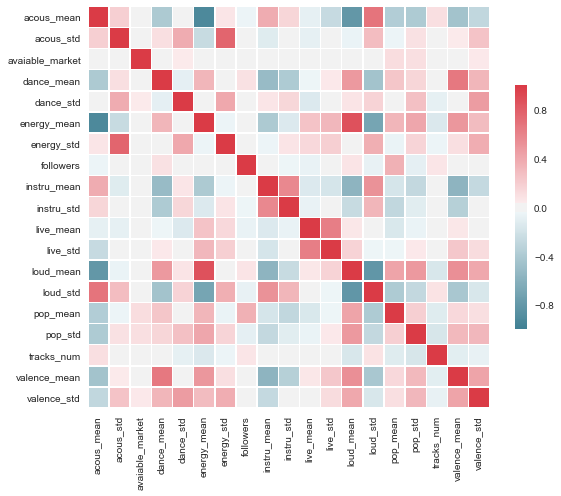

In [26]:
f, ax = plt.subplots(figsize=(9, 9))
corr =songs_df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, center=0,cmap=cmap,square=True, linewidths=.5, cbar_kws={"shrink": .5});
plt.savefig("figure2.png") # save as png

The above correlation matrix shows that the feature are not co-linear

In [31]:
plt.plot(songs_df.pop_mean,songs_df["artist_pop_mean"],"bo" , alpha = 0.2);
plt.savefig("figure3.png") # save as png
# from IPython.display import Image Image(filename='MDS.png') 

## Model

#### The Model list

* Linear Regression with one feature (Simplest)
* Linear Regression with all features
* Ridge Regression
* Lasso Regression
* Polynomial Regression
* Generalized Linear Model

In [36]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
import statsmodels.tools.tools as sm
import matplotlib.pyplot as plt
import pandas as pd
from numpy import inf
from sklearn.model_selection import train_test_split,cross_val_score

#### Linear Regression with one feature

In [47]:
playlists_dataframe = pd.read_json("playlists_dataframe_all_dummy.json")

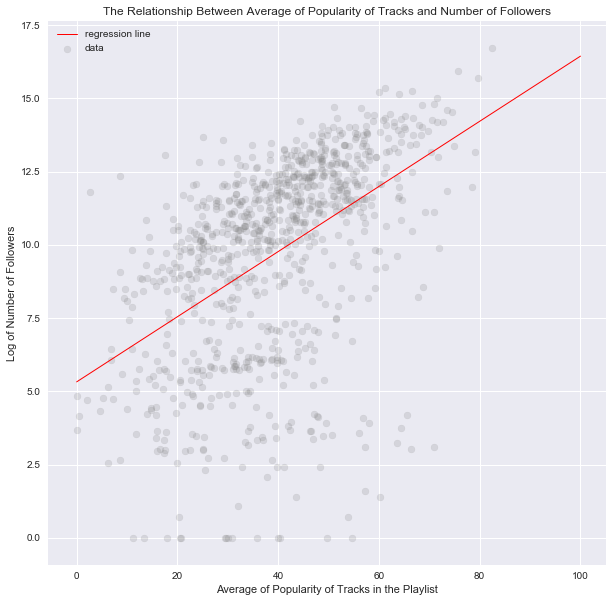

In [48]:
y = playlists_dataframe['followers']
y_log = np.log(y)
y_log[y_log == -inf] = 0
X = playlists_dataframe['pop_mean']

X_const = sm.add_constant(X)

regression = LinearRegression(fit_intercept=True)
regression.fit(X_const, y_log)

regression_line = lambda x: regression.coef_[1] * x +regression.intercept_

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

x_vals = np.linspace(0,100,100)
ax.plot(x_vals, regression_line(x_vals), color='red', linewidth=1.0, label='regression line')
ax.scatter(X, y_log, color='gray', alpha=0.2, label='data')

ax.set_xlabel('Average of Popularity of Tracks in the Playlist')
ax.set_ylabel('Log of Number of Followers')
ax.set_title('The Relationship Between Average of Popularity of Tracks and Number of Followers')
ax.legend(loc='best')
plt.show()

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_const, y_log, test_size=0.33, random_state=6)

regression = LinearRegression(fit_intercept=True)
regression.fit(X_const, y_log)

train_MSE= np.mean((y_train - regression.predict(X_train))**2)
test_MSE= np.mean((y_test - regression.predict(X_test))**2)
print('The train MSE is {}, the test MSE is {}'.format(train_MSE, test_MSE))

score = cross_val_score(estimator = regression, X = X_const, y = y_log , cv=5)
print(score)

The train MSE is 9.188335367548303, the test MSE is 7.564692068439904
[ 0.16763925  0.23816582 -0.44006665 -0.15651203 -0.11731963]


#### Linear Regression with all features

In [50]:
y = playlists_dataframe['followers']
y_log = np.log(y)
y_log[y_log == -inf] = 0
X = playlists_dataframe.drop(['followers','name'], axis=1)

X_const = sm.add_constant(X)

regression = LinearRegression(fit_intercept=True)
regression.fit(X_const, y_log)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_const, y_log, test_size=0.33, random_state=6)

regression = LinearRegression(fit_intercept=True)
regression.fit(X_const, y_log)

train_MSE= np.mean((y_train - regression.predict(X_train))**2)
test_MSE= np.mean((y_test - regression.predict(X_test))**2)
print('The train MSE is {}, the test MSE is {}'.format(train_MSE, test_MSE))

score = cross_val_score(estimator = regression, X = X_const, y = y_log , cv=5)
score

The train MSE is 6.521623380244005, the test MSE is 5.187964365936927


array([ 0.35489022,  0.32547701, -0.58934793,  0.30516589,  0.10972353])

In [52]:
#### RidgeRegression

In [53]:
from sklearn.linear_model import Ridge,RidgeCV,Lasso,LassoCV
ridge_regression = RidgeCV(alphas=(10.**np.arange(-5, 5)), fit_intercept=True)
ridge_regression.fit(X_train, y_train)
print('R2 of the model with Ridge on test set : {}'.format(ridge_regression.score(X_test,y_test)))

R2 of the model with Ridge on test set : 0.44624556643770397


In [54]:
#### LASSO Regression

In [ ]:
lasso_regression = LassoCV(alphas=(10.**np.arange(-5, 5)), fit_intercept=True)
lasso_regression.fit(X_train, y_train)
print('R2 of the model with Lasso on test set : {}'.format(lasso_regression.score(X_test, y_test)))

In [55]:
#### Polynomial Regression

In [57]:
train_R_sq = []
test_R_sq = []
max_deg = 2

min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)

for d in range(max_deg + 1):

    out = d * 1. / max_deg * 100

    gen_poly_terms = PolynomialFeatures(degree=d, interaction_only=False)
    X_train_with_poly = gen_poly_terms.fit_transform(X_train)
    X_test_with_poly = gen_poly_terms.fit_transform(X_test)
    
    poly_regression_model = LinearRegression(fit_intercept=False)
    poly_regression_model.fit(X_train_with_poly, y_train)
    
    train_R_sq.append(poly_regression_model.score(X_train_with_poly, y_train))
    test_R_sq.append(poly_regression_model.score(X_test_with_poly, y_test))

In [58]:
train_R_sq,test_R_sq

([1.1102230246251565e-16, 0.39901200912642121, 0.70885361529968272],[-0.00023987473682307581, 0.33380306461463127, -2.2600183970811027e+19])


In [56]:
from sklearn.preprocessing import PolynomialFeatures
gen_poly_terms = PolynomialFeatures(degree=2, interaction_only=False)

X_train_with_poly = gen_poly_terms.fit_transform(X_train)
X_test_with_poly = gen_poly_terms.fit_transform(X_test)

poly_regression_model = LinearRegression(fit_intercept=True)
poly_regression_model.fit(X_train_with_poly, y_train)

train_MSE= np.mean((y_train - poly_regression_model.predict(X_train_with_poly))**2)
test_MSE= np.mean((y_test - poly_regression_model.predict(X_test_with_poly))**2)
print('The train MSE for degree 2 poly model is {}, the test MSE is {}'.format(train_MSE, test_MSE))

train_R_sq = poly_regression_model.score(X_train_with_poly, y_train)
test_R_sq = poly_regression_model.score(X_test_with_poly, y_test)
print('The train R^2 for degree 2 poly model is {}, the test R^2 is {}'.format(train_R_sq, test_R_sq))

The train MSE for degree 2 poly model is 1.663702875125368, the test MSE is 4.066197748763965e+17
The train R^2 for degree 2 poly model is 0.8580561217156707, the test R^2 is -3.8272290502733016e+16


## GLM (209)

In [59]:
upgrade_dataframe = playlists_dataframe[[ 'followers', 'genre_narrow_blues',
       'genre_narrow_children', 'genre_narrow_classical', 'genre_narrow_dance',
       'genre_narrow_electronic', 'genre_narrow_funk', 'genre_narrow_hardcore',
       'genre_narrow_healing', 'genre_narrow_hiphop', 'genre_narrow_jazz',
       'genre_narrow_metal', 'genre_narrow_modern', 'genre_narrow_other',
       'genre_narrow_pop', 'genre_narrow_rap', 'genre_narrow_rock',
       'genre_narrow_soul', 'instru_mean', 'instru_std', 'name', 'pop_mean', 'pop_std',
       'tracks_num']]
y = upgrade_dataframe['followers']
y_log = np.log(y)
y_log[y_log == -inf] = 0
X = upgrade_dataframe.drop(['followers','name'], axis=1)
X_const = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X_const, y_log, test_size=0.33, random_state=17) #13

In [60]:
# Load modules and data
import statsmodels.api as sm
from sklearn.metrics import r2_score
# Instantiate a gamma family model with the default link function.
poisson_model = sm.GLM(y_train, X_train, family=sm.families.Poisson())

poisson_results = poisson_model.fit()

y_hat = poisson_results.predict(X_test)
print(r2_score(y_test,y_hat))
print(poisson_results.summary())

C:\Users\Haixing\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


0.444923294089
                 Generalized Linear Model Regression Results                  
Dep. Variable:              followers   No. Observations:                  605
Model:                            GLM   Df Residuals:                      583
Model Family:                 Poisson   Df Model:                           21
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -1529.1
Date:                Thu, 07 Dec 2017   Deviance:                       659.21
Time:                        23:43:39   Pearson chi2:                     502.
No. Iterations:                     4                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.5208      0.079     19.282      0.000       1.366       1.67